In [5]:
library(DMwR)
minmax.scale <- function(x) {
    (x-min(x)) / (max(x) - min(x))
}

set.seed(1234)
df <- iris[, 1:4]
scores1 <- lofactor(df, k = 5)
r <- kmeans(df, 3)
centers <- r$centers[r$cluster, ]
distances <- sqrt(rowSums((df - centers) ^ 2))
mcr <- ave(distances, r$cluster, FUN=mean)
scores2 <- distances / mcr

scores1 <- minmax.scale(scores1)
scores2 <- minmax.scale(scores2)

outliers1 <- order(scores1, decreasing = T)[1:5]
outliers2 <- order(scores2, decreasing = T)[1:5]

intersect(outliers1, outliers2)

[1] 42

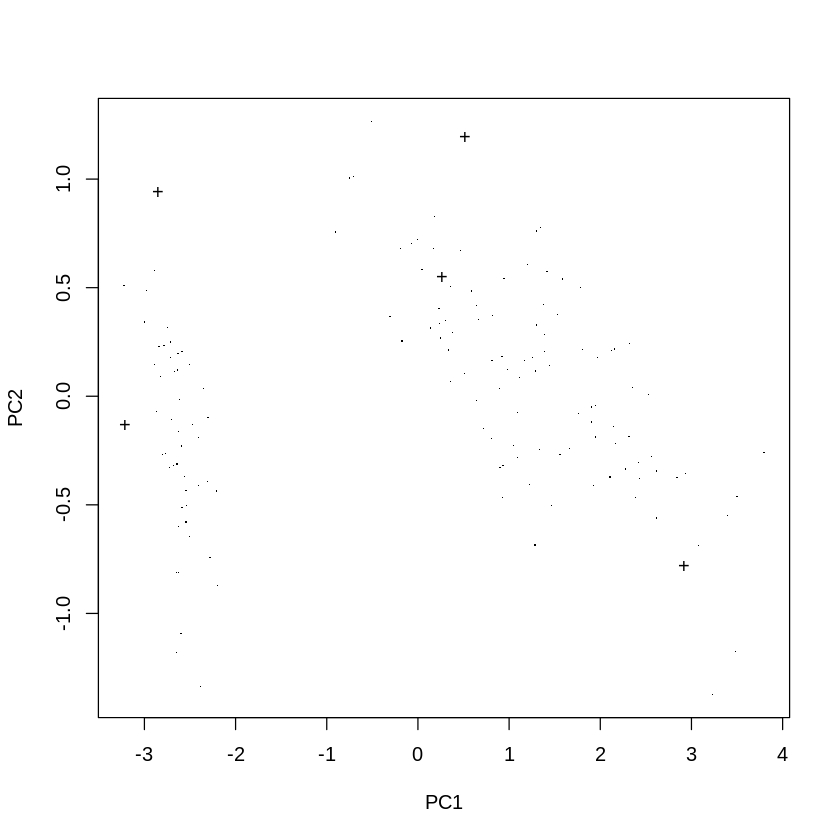

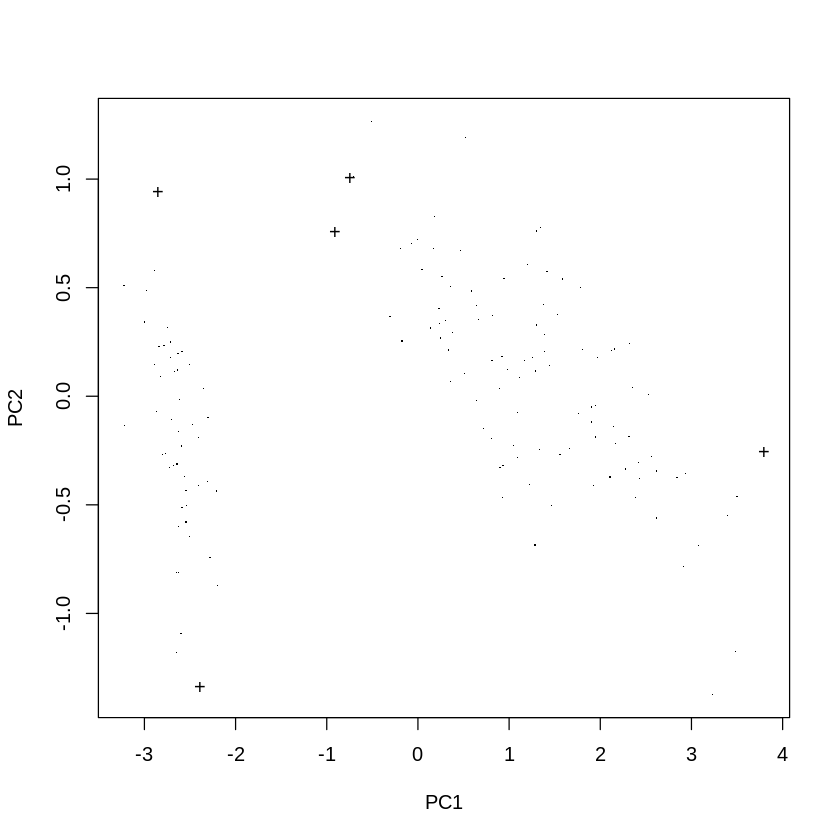

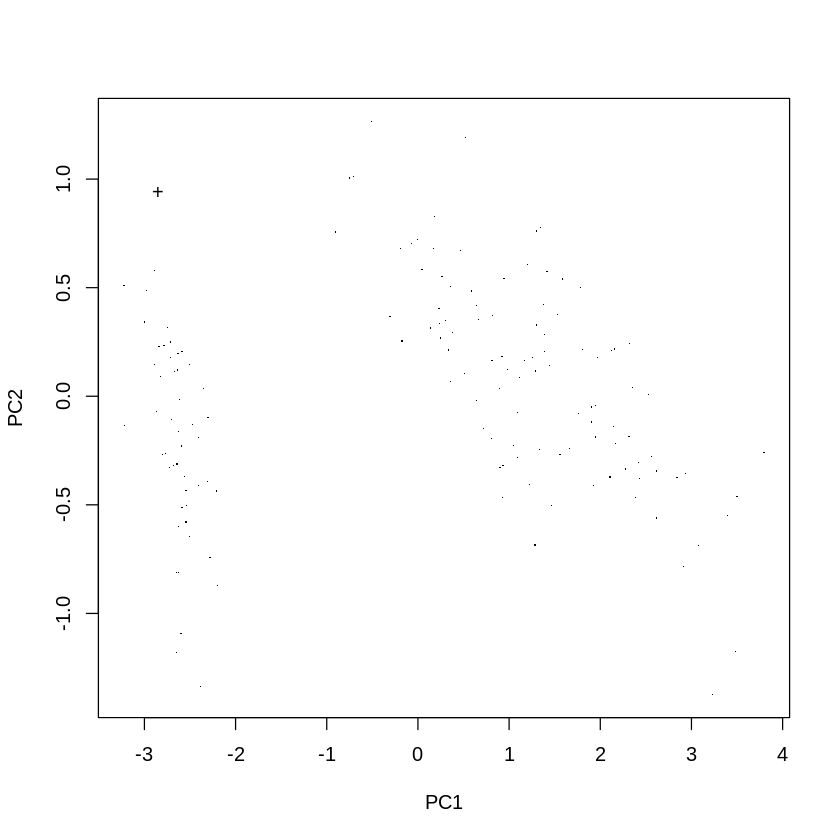

In [6]:
plot.outliers = function(data, outliers) {    
    xy <- prcomp(data)$x[, 1:2]
    pch <- rep(".", nrow(xy))
    pch[outliers] <- "+"
    plot(xy, pch=pch)
}

plot.outliers(df, outliers1)
plot.outliers(df, outliers2)
plot.outliers(df, intersect(outliers1, outliers2))

[1]  42 107  23  16  99  58 119

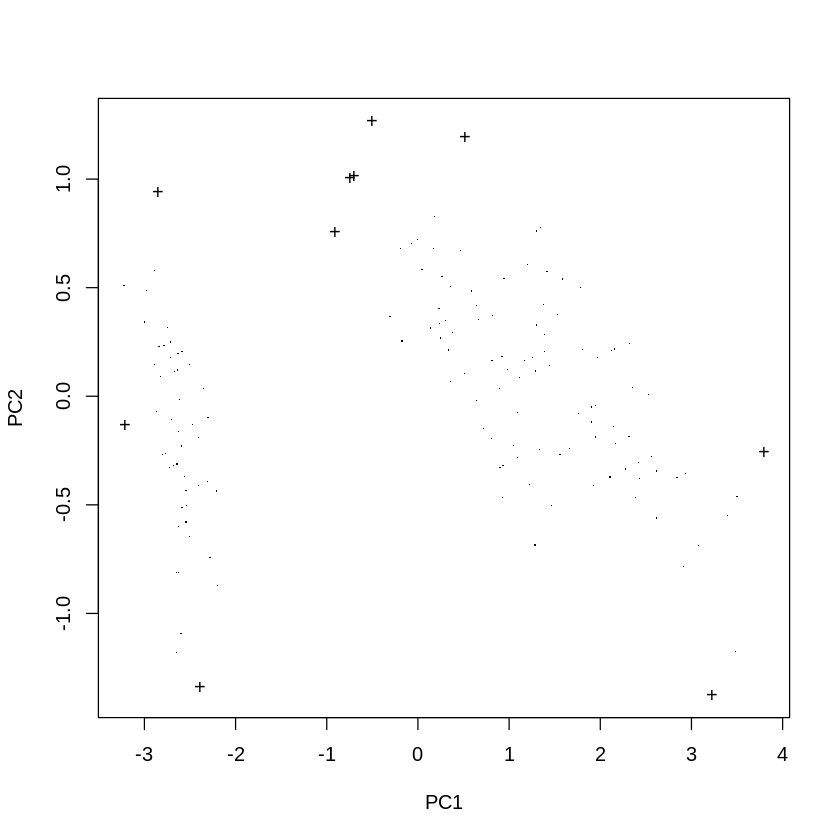

In [14]:
scores3 <- (scores1 + scores2) / 2
outliers3 <- order(scores3, decreasing = T)[1:10]

outliers12 <- union(outliers1, outliers2)
intersect(outliers12, outliers3)

plot.outliers(df, outliers3)